## Load in predictions and true values

In [1]:
import pickle 
def load_pickled_file(filename: str):
    with open(filename, 'rb') as file:
        loaded_object = pickle.load(file)
    return loaded_object
true_values = load_pickled_file("./positive_positive_true_values.pickle") 
predicted_values = load_pickled_file("./positive_positive_predictions.pickle")
print(true_values.shape)
print(predicted_values.shape)

(15134, 15134)
(15134, 15134)


In [2]:
from matchms.importing.load_from_mgf import load_from_mgf
val_spectra = list(load_from_mgf("./positive_validation_spectra.mgf"))
print(len(val_spectra))

15134


# Ideas: 
- Do a comparison between how often a spectrum is wrong vs how often it is not.
- Convert the plot to percentages
- Check what the average true value is per inchikey related to their counts.
- Make a comparison with spectra vs unique inchikey. So you compare something like 15000 vs 1129

## Calculate the nr of spectrums per inchikey

In [49]:
import numpy as np
list_of_inchikeys = []
for spectrum in val_spectra:
    inchikey = spectrum.get("inchikey")[:14]
    list_of_inchikeys.append(inchikey)
unique_inchikeys, inchikey_counts = np.unique(np.array(list_of_inchikeys), return_counts=True)
print(len(unique_inchikeys))

1129


### Function for plotting the nr of inchikey frequencies for specicif qualities of predictions

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def create_plot_for_unique_indices(indices, inchikey_counts):
    unique_indices, counts = np.unique(indices, return_counts=True)
    list_of_inchikey_frequencies = []
    inchikey_frequency_counts =[]
    for count_idx, idx in enumerate(unique_indices):
        inchikey = val_spectra[idx].get("inchikey")[:14]
        inchikey_count = inchikey_counts[unique_inchikeys == inchikey]
        inchikey_frequency = inchikey_count[0] if inchikey_count.size > 0 else 0
        inchikey_frequency_counts += [inchikey_frequency] * counts[count_idx]
        list_of_inchikey_frequencies += [inchikey] * counts[count_idx]
    inchikey_frequencies = np.array(list_of_inchikey_frequencies)
    inchikey_frequencies.shape
    
    selected_unique_inchikeys, selected_inchikey_counts = np.unique(inchikey_frequencies, return_counts=True)
    # Sort indices based on counts in descending order
    sorted_indices = np.argsort(selected_inchikey_counts)[::-1]
    
    # Display the sorted results
    for idx in sorted_indices:
        inchikey_count = inchikey_counts[unique_inchikeys == selected_unique_inchikeys[idx]]
        inchikey_frequency = inchikey_count[0] if inchikey_count.size > 0 else 0
        # print(f"Index: {selected_unique_inchikeys[idx]}, Count: {selected_inchikey_counts[idx]}, Inchikey_frequence: {inchikey_frequency}")
    
    plt.hist(inchikey_frequency_counts, bins = 50)
    plt.xlabel('Nr of spectra per inchikey')
    plt.ylabel('Counts')
    # plt.ylim(0,60000)

## Select the spectra that have bad predictions

In [24]:
import numpy as np
indices = np.where((true_values > 0.8) & (true_values < 0.9))[0]
create_plot_for_unique_indices(indices, inchikey_counts)
indices = np.where((predicted_values < 0.5) & (true_values > 0.8) & (true_values < 0.9))[0]
create_plot_for_unique_indices(indices, inchikey_counts)

In [26]:
import numpy as np
indices = np.where((true_values > 0.9) & (true_values < 1.0))[0]
create_plot_for_unique_indices(indices, inchikey_counts)
indices = np.where((predicted_values < 0.6) & (true_values > 0.9) & (true_values < 1.0))[0]
create_plot_for_unique_indices(indices, inchikey_counts)

In [27]:
import numpy as np
indices = np.where((true_values == 1.0))[0]
create_plot_for_unique_indices(indices, inchikey_counts)
indices = np.where((predicted_values < 0.6) & (true_values == 1.0))[0]
create_plot_for_unique_indices(indices, inchikey_counts)

## Calculate RMSE per spectrum

In [5]:
import numpy as np
differences = true_values - predicted_values
# Step 2: Square the differences
squared_diff = differences ** 2
# Step 3: Calculate the mean of squared differences
mean_squared_diff = np.mean(squared_diff, axis=0)
# Step 4: Take the square root of the mean
rmse = np.sqrt(mean_squared_diff)
rmse.shape

(15134,)

In [33]:
# print the spectra with the highest RMSE
rmse_indexes_sorted = np.argsort(rmse)[::-1]
for index in rmse_indexes_sorted:
    rmse_for_spectrum = rmse[index]
    spectrum = val_spectra[index]
    inchikey = spectrum.get('inchikey')[:14]
    print(inchikey)
    inchikey_count = inchikey_counts[unique_inchikeys == inchikey]
    inchikey_frequency = inchikey_count[0] if inchikey_count.size > 0 else 0
    print(inchikey_frequency)

QNGIKJLVQNCRRC
11
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
QNGIKJLVQNCRRC
11
OAIJSZIZWZSQBC
60
FGKJLKRYENPLQH
5
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
WTLBZVNBAKMVDP
32
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
FSBIGDSBMBYOPN
30
FSBIGDSBMBYOPN
30
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
OAIJSZIZWZSQBC
60
NEGQHKSYEYVFTD
341
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
OAIJSZIZWZSQBC
60
YYGNTYWPHWGJRM
72
YYGNTYWPHW

In [52]:
import pandas as pd

# Get the masses per spectrum
masses = []
for spectrum in val_spectra:
    mass = spectrum.get("precursor_mz")
    masses.append(mass)

# Calculate the inchikey frequency per spectrum
inchikey_count_per_spectrum = []
for spectrum in val_spectra:
    inchikey = spectrum.get("inchikey")[:14]
    inchikey_count = inchikey_counts[unique_inchikeys == inchikey]
    inchikey_frequency = inchikey_count[0] if inchikey_count.size > 0 else 0
    inchikey_count_per_spectrum.append(inchikey_frequency)
len(inchikey_count_per_spectrum)

# Get adduct per spectrum
adducts = []
for spectrum in val_spectra:
    adduct = spectrum.get("adduct")
    adducts.append(adduct)

# calculate average tanimoto score per spectrum
average_tanimoto_score = np.mean(true_values, axis=0)
average_prediction = np.mean(predicted_values, axis=0)
tanimoto_score_above_0_7 = np.sum((true_values > 0.7) & (true_values < 1.0), axis=0)

# Get nr of fragments
nr_of_fragments_per_spec = []
for spectrum in val_spectra:
    nr_of_fragments = len(spectrum.peaks)
    if nr_of_fragments > 1000:
        nr_of_fragments = 1000
    nr_of_fragments_per_spec.append(nr_of_fragments)

spectrum_indexes = 


spectrum_comparison = pd.DataFrame({"RMSE": rmse, 
                                    "adducts": adducts, 
                                    "inchikey_frequency": inchikey_count_per_spectrum,
                                   "precursor_mz": masses,
                                   "average_tanimoto_score": average_tanimoto_score,
                                   "average_predicted_ms2deepscore": average_prediction,
                                   "nr_of_fragments": nr_of_fragments_per_spec,
                                   "tanimoto_score_above 0.7": tanimoto_score_above_0_7})


## Compare RMSE vs adduct

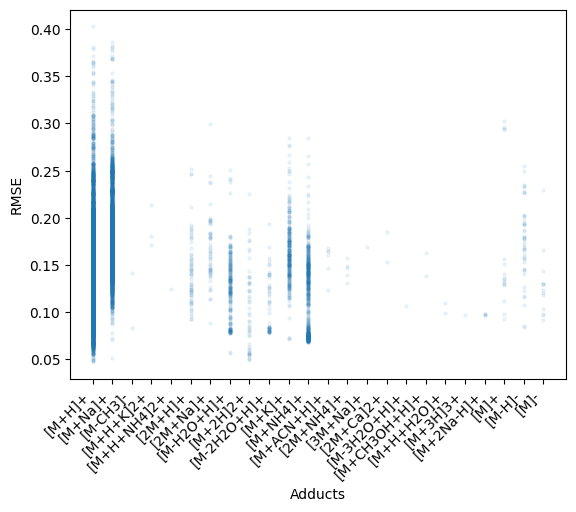

In [29]:
import matplotlib.pyplot as plt
plt.scatter(adducts, rmse, s=5, alpha=0.07)
plt.xlabel('Adducts')
plt.ylabel('RMSE')
plt.xticks(rotation=45, ha='right')
plt.show()

## Compare all

C:\Users\jonge094\AppData\Local\miniconda3\envs\ms2deepscore\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


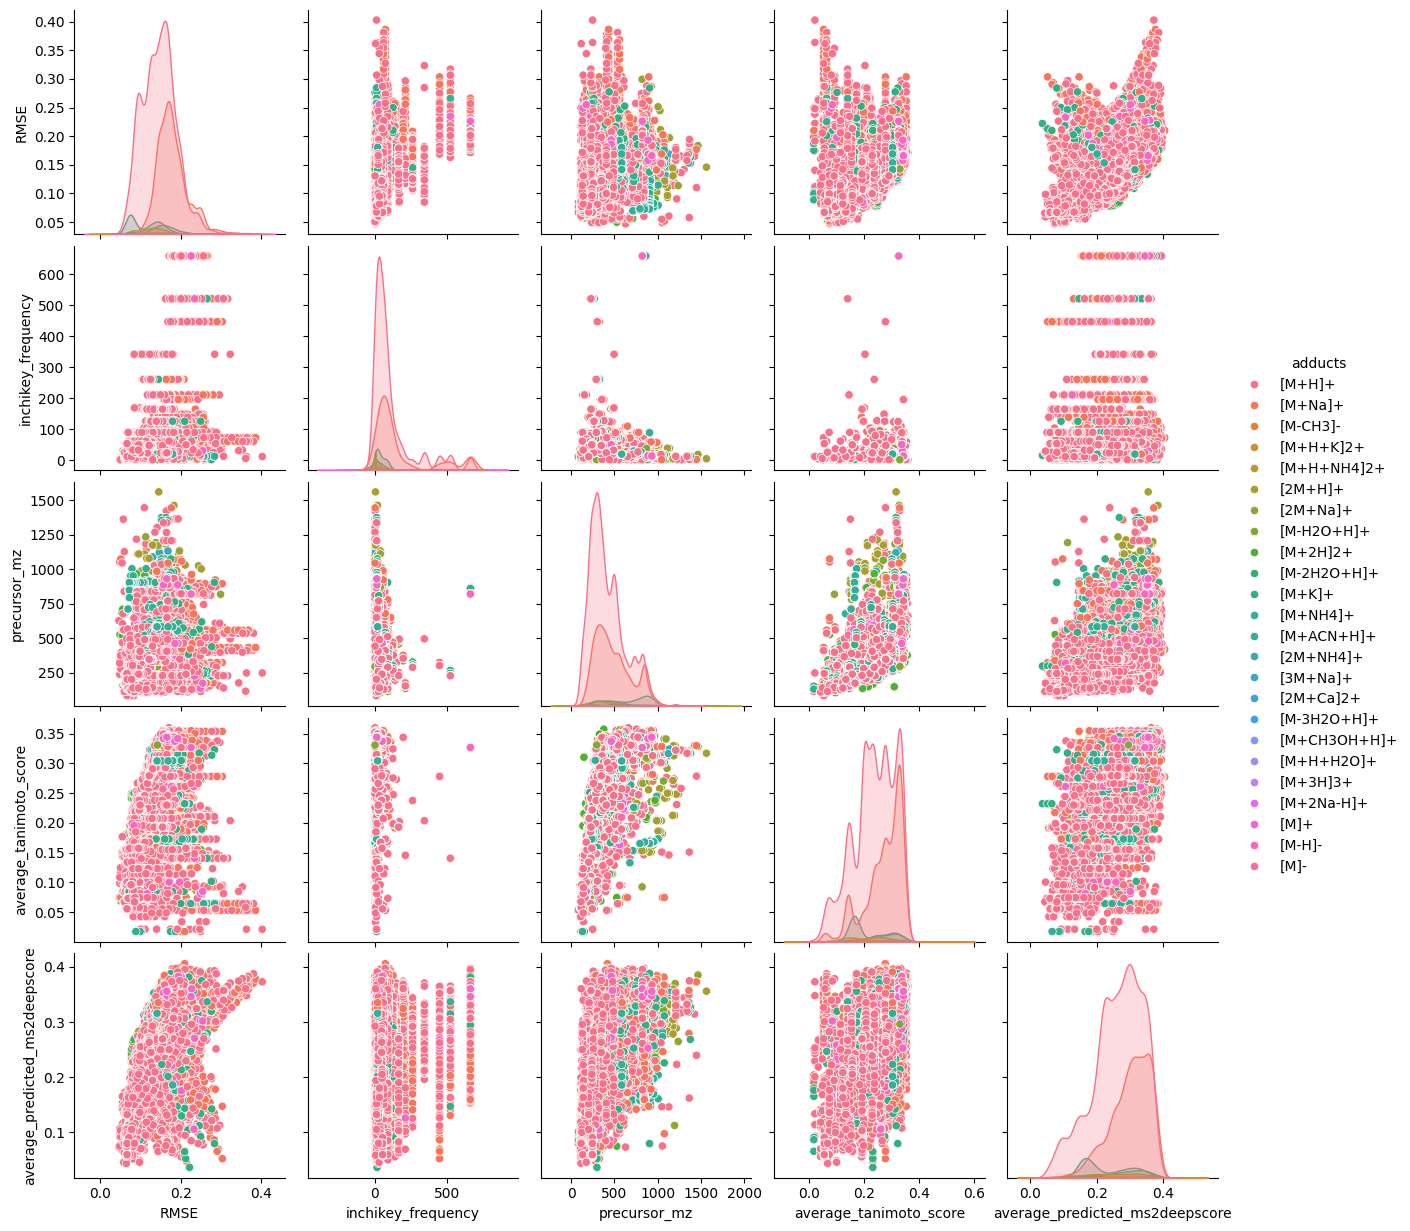

In [36]:
import seaborn as sns
sns.pairplot(spectrum_comparison, hue="adducts")

C:\Users\jonge094\AppData\Local\miniconda3\envs\ms2deepscore\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


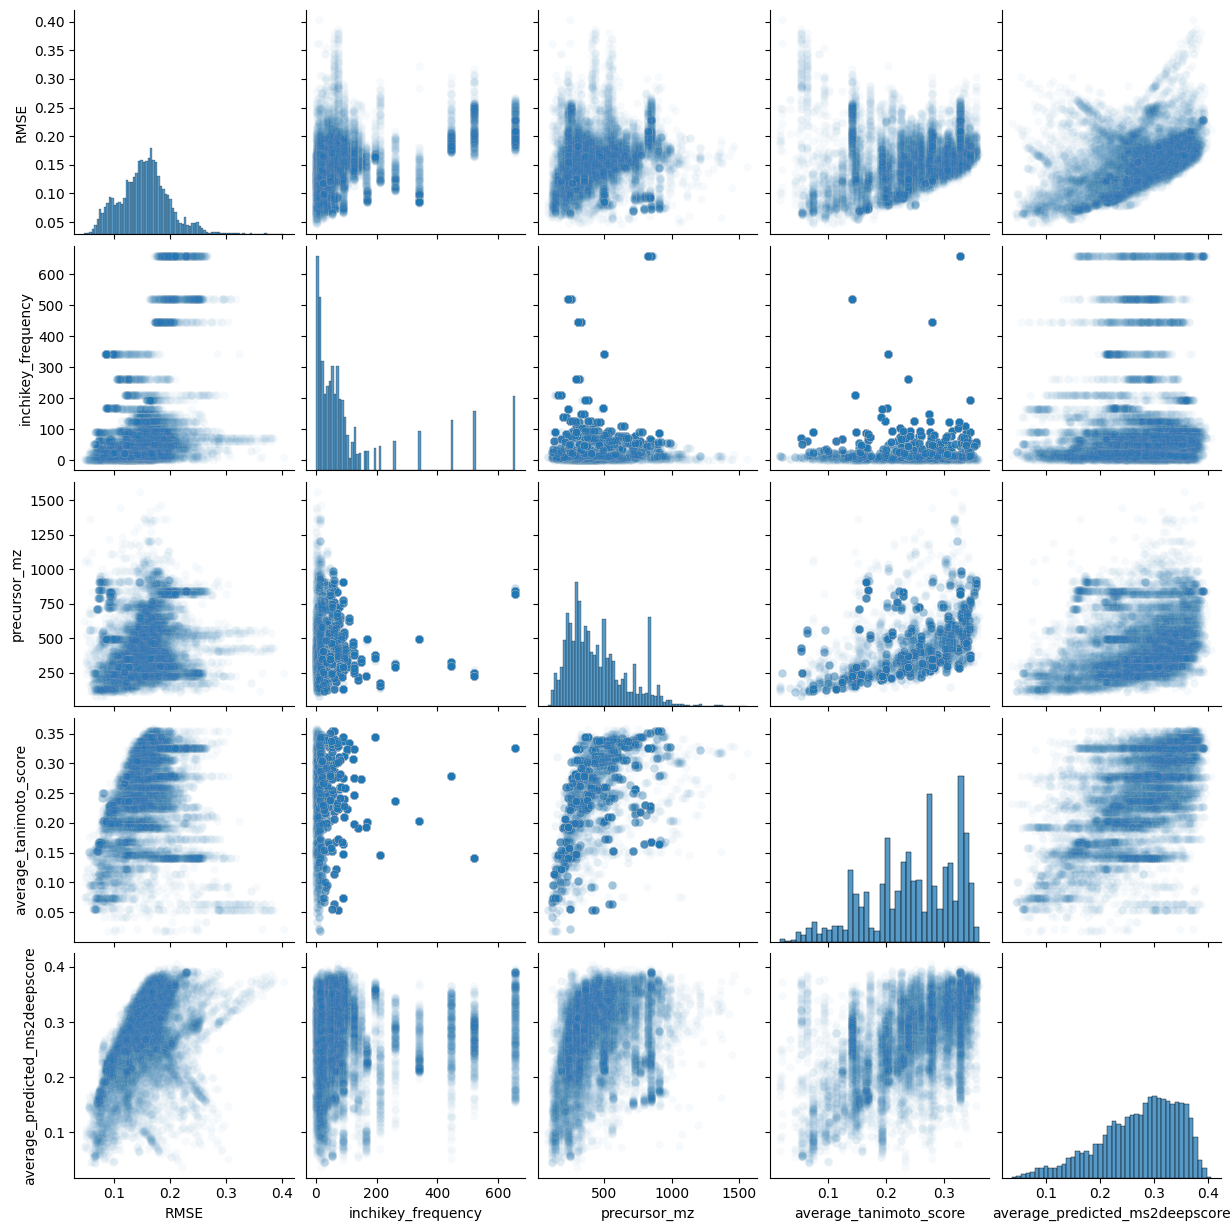

In [35]:
sns.pairplot(spectrum_comparison, plot_kws=dict(alpha=0.03))

In [48]:
sns.pairplot(spectrum_comparison, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}})

C:\Users\jonge094\AppData\Local\miniconda3\envs\ms2deepscore\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


C:\Users\jonge094\AppData\Local\miniconda3\envs\ms2deepscore\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


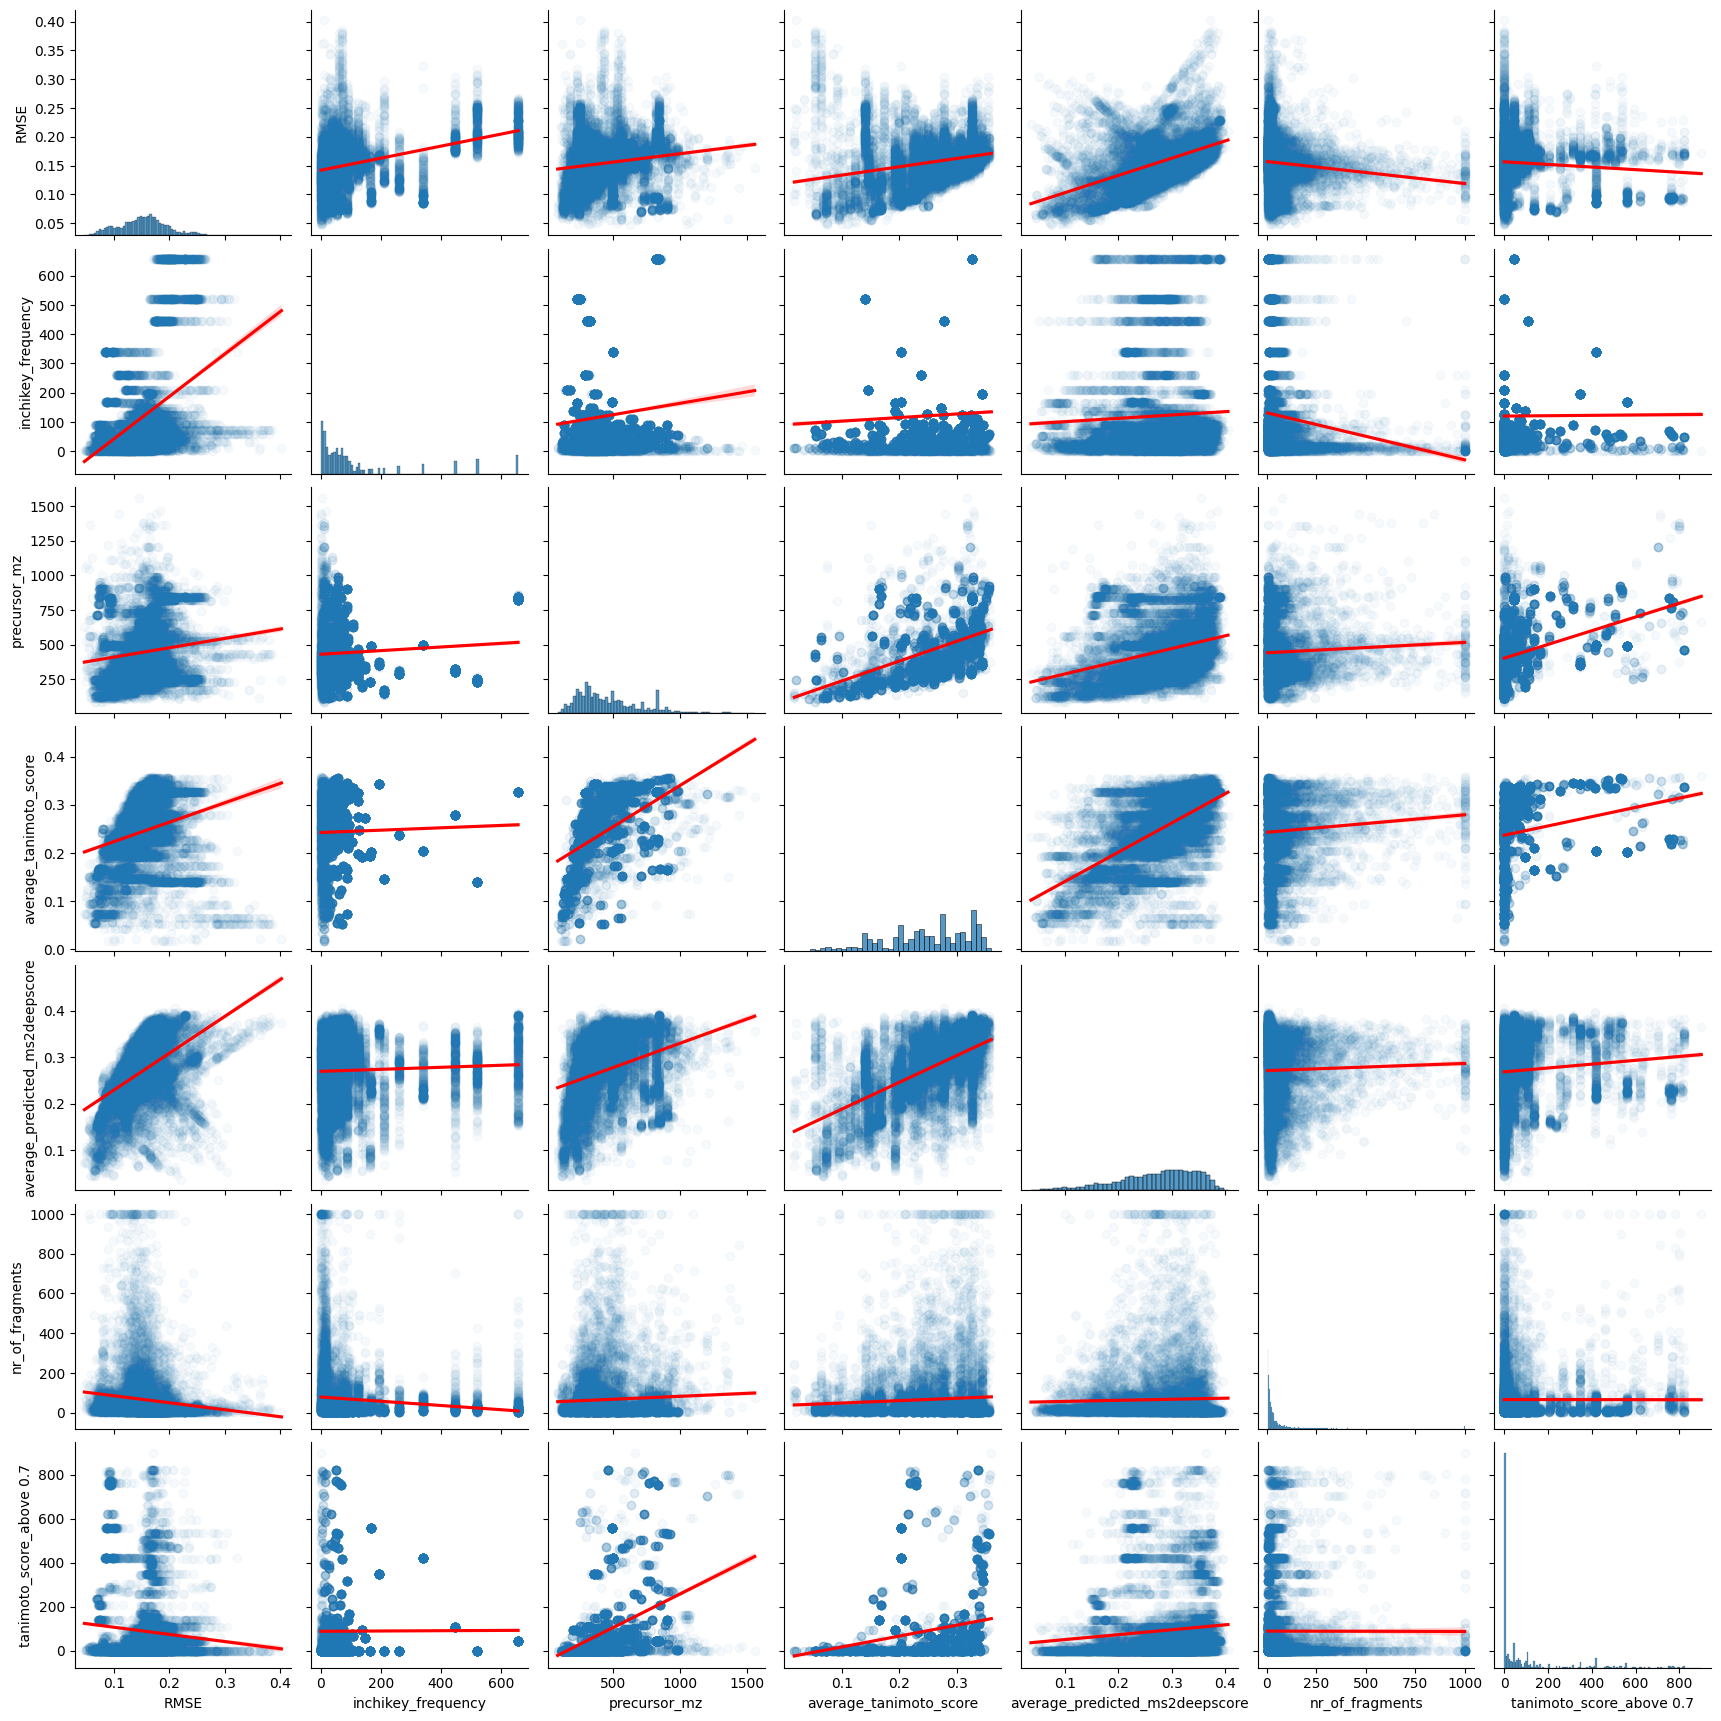

In [53]:
sns.pairplot(spectrum_comparison, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.03}})

## Plot hist for inchikey frequency above 0.20 RMSE

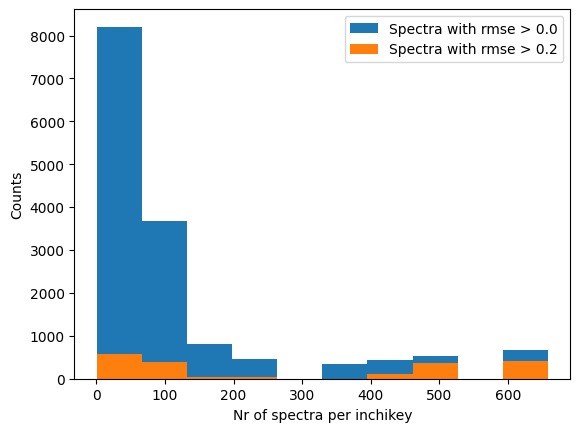

In [73]:
def plot_hist_inchikey_freq_above_rmse(minimal_rmse):
    idx_with_high_rmse = np.where(rmse > minimal_rmse)[0]
    inchikey_count_per_spectrum = []
    for idx in idx_with_high_rmse:
        spectrum = val_spectra[idx]
        inchikey = spectrum.get("inchikey")[:14]
        inchikey_count = inchikey_counts[unique_inchikeys == inchikey]
        inchikey_frequency = inchikey_count[0] if inchikey_count.size > 0 else 0
        inchikey_count_per_spectrum.append(inchikey_frequency)
    plt.hist(inchikey_count_per_spectrum, label = f"Spectra with rmse > {minimal_rmse}")
    plt.xlabel('Nr of spectra per inchikey')
    plt.ylabel('Counts')
    plt.legend()
    # plt.label(f"Spectra with rmse > {minimal_rmse}")
plot_hist_inchikey_freq_above_rmse(0.0)
plot_hist_inchikey_freq_above_rmse(0.2)
# plot_hist_inchikey_freq_above_rmse(0.3)

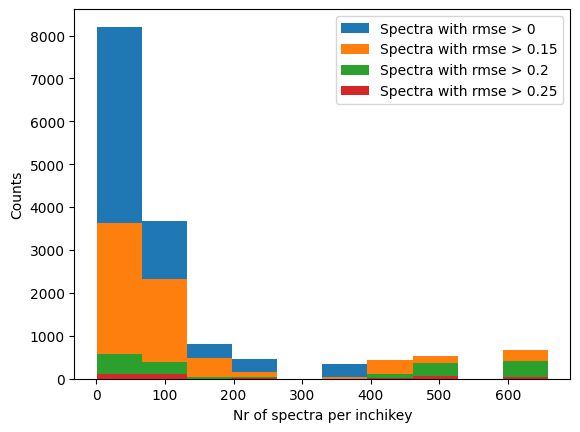

In [74]:
plot_hist_inchikey_freq_above_rmse(0)
plot_hist_inchikey_freq_above_rmse(0.15)
plot_hist_inchikey_freq_above_rmse(0.2)
plot_hist_inchikey_freq_above_rmse(0.25)